## Multiple Linear Regression Using Gradient Descent

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
class Multiple_GDRegressor():

    def __init__(self, lr, epochs):
        self.ita = lr
        self.epochs = epochs
        self.w = np.ones((len(X[0])+1, 1)) # [[Bo], [B1], [B2] ....[Bm]]

        self.all_updated_weights = [self.w.ravel()]
        
    def fit(self, X, Y):
        
        x_1s = np.column_stack((np.ones((len(X), 1)), X)) # adding columns of Ones in place Xi0.
        Y = Y.reshape(-1, 1)
        
        self.all_updated_loss = np.array([self.SSE(x_1s,Y)])

        for e in range(self.epochs):
            '''
            key idea: updated_weight = old_weight - learning_rate * gradient
            gradient: collection of intercept and partial derivates at point (old_weight) on lossfunction : Visualize this
            say f(x,y) is loss function at point (x,y)
                then,gradient vector ; (▼)f(x,y) = ( f`x, f`y) : basic multivariate calculus.
            alternatively ; gradient = direction of stepest ascent but using '-' sign we make it gradient descent
            '''
            
            gradient_vector = (2 * (x_1s.T)) @ ((x_1s @ self.w) - Y) # slopes
            
            self.w -= self.ita * gradient_vector
            
            self.all_updated_weights.append(list(self.w.ravel()))
            self.all_updated_loss = np.append(self.all_updated_loss, self.SSE(x_1s, Y))

    
    def SSE(self, X, Y):
        
        """
        Loss_Function: Sum of squared error
        X: = x_1s : column vector of ones has been added to Xi0. 
        """
        
        prediction_vector = X @ self.w
        sse = np.sum((Y-prediction_vector) ** 2)

        return sse

In [4]:
from sklearn.datasets import fetch_california_housing

In [56]:
data = fetch_california_housing()

df = pd.read_csv("data/multiple_linear_regression_dataset.csv")

In [57]:
df.shape

(20, 3)

In [58]:
df.head(4)

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130


In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler = StandardScaler()

In [61]:
scaler.fit(df)

StandardScaler()

In [62]:
data = scaler.transform(df)

In [63]:
data[:5]

array([[-1.49890262, -1.29354835, -1.25034993],
       [-0.98733176, -0.79602975, -0.61578412],
       [ 0.75200916, -1.04478905, -1.11298223],
       [-0.78270342, -0.29851116, -0.0736072 ],
       [ 0.34275248,  0.94528533,  0.86243815]])

In [64]:
feature, label = data[:, :-1], data[:,-1]

In [65]:
feature[:5], label[:5]

(array([[-1.49890262, -1.29354835],
        [-0.98733176, -0.79602975],
        [ 0.75200916, -1.04478905],
        [-0.78270342, -0.29851116],
        [ 0.34275248,  0.94528533]]),
 array([-1.25034993, -0.61578412, -1.11298223, -0.0736072 ,  0.86243815]))

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X,x, Y,y = train_test_split(feature, label, random_state=42, test_size=0.1)

In [68]:
X.shape

(18, 2)

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
lr = LinearRegression()

In [71]:
lr.fit(X,Y)

LinearRegression()

In [99]:
lr.intercept_,lr.coef_, 

(np.float64(0.0073918348365801245), array([-0.12723157,  1.05293338]))

In [93]:
mgdr = Multiple_GDRegressor(0.01,30)

In [94]:
mgdr.fit(X,Y)

In [95]:
mgdr.w

array([[ 0.00696477],
       [-0.12252175],
       [ 1.0488546 ]])

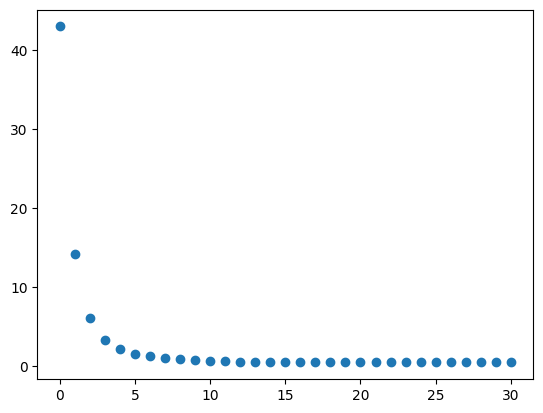

In [96]:
plt.scatter([e for e in range(len(mgdr.all_updated_loss))], mgdr.all_updated_loss)

In [97]:
mgdr.all_updated_loss

array([43.01903265, 14.12821819,  6.03353734,  3.32283875,  2.17820592,
        1.58110929,  1.22235988,  0.98902233,  0.83061285,  0.72045606,
        0.64275638,  0.58746742,  0.54790669,  0.51949958,  0.4990551 ,
        0.48431985,  0.47368954,  0.46601601,  0.46047471,  0.45647217,
        0.45358063,  0.4514915 ,  0.44998201,  0.44889129,  0.44810314,
        0.44753361,  0.44712207,  0.44682468,  0.44660978,  0.44645448,
        0.44634226])

In [98]:
mgdr.all_updated_weights[:2]

[array([ 0.00696477, -0.12252175,  1.0488546 ]),
 [np.float64(0.5732022511307233),
  np.float64(0.6102478609305921),
  np.float64(0.7822887558410606)]]